In [1]:
library(survival)
library(ggplot2)
library(dplyr)
library(reshape2)
library(fmsb)
library(boot)
library(stringr)
#library("performance") # for r2_tjur

Warning message:
“package ‘survival’ was built under R version 4.0.5”
Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘reshape2’ was built under R version 4.0.5”
Warning message:
“package ‘fmsb’ was built under R version 4.0.5”
Warning message:
“package ‘boot’ was built under R version 4.0.3”

Attaching package: ‘boot’


The following object is masked from ‘package:survival’:

    aml


Warning message:
“package ‘stringr’ was built under R version 4.0.5”


In [2]:
dir_fig = 'R_clogitR2_combined/v2/'

In [3]:
#prs_mode = 'sbayesr'
prs_mode = 'prscs'
if (prs_mode == 'sbayesr') {
    file_main = 'combined_svs_trs_snvs_prs_pc_sbayesr.csv'
} else if (prs_mode == 'prscs') {
    file_main = 'combined_svs_trs_snvs_prs_pc_prscs.csv'}
#file_main = 'combined_svs_trs_snvs_prs_pc.csv'
df_main <- read.table(file_main, header = TRUE, sep = ",")
df_main['count_PLIp9_nonLOF_DEV_BR_10_cds'] = df_main[,'count_PLIp9_DEV_BR_GENE_10_cds'] - df_main[,'count_PLIp9_LOF_DEV_BR_10_cds']
df_main

fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,⋯,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP1_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP2_Q,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3,count_ZS9_PLIp9_DEV_BR_GENE_10_intron_SUPP3_Q,PRS_ASD_Z,PRS_SCZ_Z,PRS_EDU_Z,count_dnlof_inhlof,count_PLIp9_nonLOF_DEV_BR_10_cds
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627126,-0.005607061,⋯,126,16,14,0,0,-0.971701072,-0.510485305,0.82162924,0,0
F0026,REACH000026,ASD,Male,1,trio,1,0,0.095363540,-0.045229620,⋯,1,1,1,1,1,0.303644763,0.817056455,0.06312390,1,0
F0058,REACH000058,ASD,Male,1,trio,1,1,0.002421759,-0.009216429,⋯,5,1,1,1,1,0.595643472,-0.305436874,1.94303491,2,0
F0065,REACH000065,ASD,Male,1,trio,1,0,0.252773800,0.107932900,⋯,0,0,0,0,0,1.166191828,0.943709479,-2.78896425,1,0
F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785250,0.038064880,⋯,1,1,0,0,0,0.703902177,-0.152554399,0.06482359,0,0
F0078,REACH000089,ASD,Female,1,trio,2,0,0.049879690,0.047204300,⋯,0,0,0,0,0,0.384605619,0.209070495,0.16440487,0,0
F0081,REACH000092,ASD,Female,1,trio,1,1,-0.028510680,-0.001001894,⋯,3,2,2,1,1,-0.898010204,-0.994547648,0.53088874,1,0
F0081,REACH000095,CON,Female,1,trio,1,1,-0.030440730,-0.002736118,⋯,1,1,1,1,1,-1.036073363,-1.487948561,0.29231934,1,0
F0083,REACH000097,ASD,Male,1,trio,1,0,0.095793110,0.052887850,⋯,2,2,1,1,1,0.817923575,-0.003587407,-0.08546761,1,0


In [4]:
print(min(df_main['count_PLIp9_nonLOF_DEV_BR_10_cds']))
print(max(df_main['count_PLIp9_nonLOF_DEV_BR_10_cds']))

print(min(df_main['count_PLIp9_LOF_DEV_BR_10_cds']))
print(max(df_main['count_PLIp9_LOF_DEV_BR_10_cds']))

[1] 0
[1] 1
[1] 0
[1] 6


In [8]:
getMcFaddenR2_bootstrap <- function(null_formula, model_formula, data, indices) {
    d <- data[indices,]
    #null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
    #                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
    #loglik0 = null_model$loglik[2]
    
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    null_model <- clogit(null_formula, data = d)
    clogit_model <- clogit(model_formula, data = d)
    
    loglik0 = logLik(null_model)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    #print(paste(loglik0, loglikM, as.double(mcf_r2)))
    return(as.double(mcf_r2))
}

#getNagelkerkeR2_bootstrap <- function(null_formula, model_formula, data, indices) {
#    d <- data[indices,]
#    #null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
#    #                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
#    #null_model <- glm(formula = null_formula , data = d, family = binomial)
#    #alt_model <- glm(formula = formula , data = d, family = binomial)
#    #this_R2 = NagelkerkeR2(alt_model)$R2 - NagelkerkeR2(null_model)$R2
#    #return(this_R2)
#    null_model <- clogit(null_formula, data = d, method="approximate")
#    clogit_model <- clogit(model_formula, data = d, method="approximate")
#    
#    loglik0 = logLik(null_model)
#    loglikM = logLik(clogit_model)
#    cs_r2 = 1.0 - exp(2/nrow(d) * (loglik0 - loglikM))
#    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(d) * (loglik0)))
#    #print(as.double(ngk_r2))
#    return(as.double(ngk_r2))
#}

getNagelkerkeR2_bootstrap <- function(null_formula, model_formula, data, indices) {
    d <- data[indices,]
    #null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
    #                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
    #null_model <- glm(formula = null_formula , data = d, family = binomial)
    #alt_model <- glm(formula = formula , data = d, family = binomial)
    #this_R2 = NagelkerkeR2(alt_model)$R2 - NagelkerkeR2(null_model)$R2
    #return(this_R2)
    #method="approximate"
    null_model <- try(clogit(null_formula, data = d, method="approximate"), silent = TRUE)
    clogit_model <- try(clogit(model_formula, data = d, method="approximate"), silent = TRUE)

    # Check if the model fitting was successful
    if (inherits(null_model, "try-error") || inherits(clogit_model, "try-error")) {
        return(NA)  # Return NA if the model couldn't be fitted
    } else {
        loglik0 = logLik(null_model)
        loglikM = logLik(clogit_model)
        cs_r2 = 1.0 - exp(2/nrow(d) * (loglik0 - loglikM))
        ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(d) * (loglik0)))
        #print(as.double(ngk_r2))
        return(as.double(ngk_r2))
    }
}

In [5]:
get_pval_char <- function(pval) {
    if (pval>0.05) {return('')}
    if ((pval<0.05) && (pval>0.01)) {return('*')}
    else if ((pval<0.01) && (pval>0.001)) {return('**')}
    else {return('***')}
}

[1] "working on var: count_dnlof_inhlof"
[1] "null_formula:"
Phenotype ~ count_PLIp9_cds + count_PLIp9_utr + count_PLIp9_DEV_BR_GENE_10_cds + 
    count_PLIp9_DEV_BR_GENE_10_utr + count_ZS3_PLIp9_cds_SUPP3_Q + 
    count_ZS3_PLIp9_utr_SUPP3_Q + count_ZS3_FDR_ASD_cds_SUPP3_Q + 
    count_ZS3_FDR_ASD_utr_SUPP3_Q + PRS_ASD_Z + sex + MEAN_COVERAGE + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    strata(fid)
[1] "model_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    count_ZS3_PLIp9_cds_SUPP3_Q + count_ZS3_PLIp9_utr_SUPP3_Q + 
    count_ZS3_FDR_ASD_cds_SUPP3_Q + count_ZS3_FDR_ASD_utr_SUPP3_Q + 
    PRS_ASD_Z + sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)
[1] "ngk_ste:"
[1] 0.03893835
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9999 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_

Warning message in norm.inter(t, adj.alpha):
“extreme order statistics used as endpoints”


[1] "ngk_ste:"
[1] 0.02683985
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9999 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0000,  0.0258 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable
[1] "ngk_ci_lower:"
[1] 4.174274e-07
[1] "ngk_ci_upper:"
[1] 0.02582207
[1] "working on var: count_ZS3_FDR_ASD_cds_SUPP3_Q + count_ZS3_FDR_ASD_utr_SUPP3_Q"
[1] "null_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    count_ZS3_PLIp9_cds_SUPP3_Q + count_ZS3_PLIp9_utr_SUPP3_Q + 
    PRS_ASD_Z + sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)
[1] "model_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    count_ZS3_

Warning message in norm.inter(t, adj.alpha):
“extreme order statistics used as endpoints”


[1] "ngk_ste:"
[1] 0.02447653
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9999 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0000,  0.0036 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable
[1] "ngk_ci_lower:"
[1] 5.243286e-07
[1] "ngk_ci_upper:"
[1] 0.003602696
[1] "working on var: count_ZS3_PLIp9_cds_SUPP3_Q + count_ZS3_PLIp9_utr_SUPP3_Q + count_ZS3_FDR_ASD_cds_SUPP3_Q + count_ZS3_FDR_ASD_utr_SUPP3_Q"
[1] "null_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    PRS_ASD_Z + sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)
[1] "model_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    count_ZS3_PLIp

Warning message in norm.inter(t, adj.alpha):
“extreme order statistics used as endpoints”


[1] "ngk_ste:"
[1] 0.03330212
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9999 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0001,  0.0089 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable
[1] "ngk_ci_lower:"
[1] 9.745331e-05
[1] "ngk_ci_upper:"
[1] 0.008852366
[1] "working on var: count_PLIp9_cds + count_PLIp9_utr + count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + count_ZS3_PLIp9_cds_SUPP3_Q + count_ZS3_PLIp9_utr_SUPP3_Q + count_ZS3_FDR_ASD_cds_SUPP3_Q + count_ZS3_FDR_ASD_utr_SUPP3_Q"
[1] "null_formula:"
Phenotype ~ count_dnlof_inhlof + PRS_ASD_Z + sex + MEAN_COVERAGE + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    strata(fid)
[1] "model_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    count_ZS3_PLIp9_cds

Warning message in norm.inter(t, adj.alpha):
“extreme order statistics used as endpoints”


[1] "ngk_ste:"
[1] 0.04695373
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 9999 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   ( 0.0082,  0.0695 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable
[1] "ngk_ci_lower:"
[1] 0.008236553
[1] "ngk_ci_upper:"
[1] 0.06950903
[1] "working on var: PRS_ASD_Z"
[1] "null_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    count_ZS3_PLIp9_cds_SUPP3_Q + count_ZS3_PLIp9_utr_SUPP3_Q + 
    count_ZS3_FDR_ASD_cds_SUPP3_Q + count_ZS3_FDR_ASD_utr_SUPP3_Q + 
    sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + 
    PC7 + PC8 + PC9 + PC10 + strata(fid)
[1] "model_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    count_

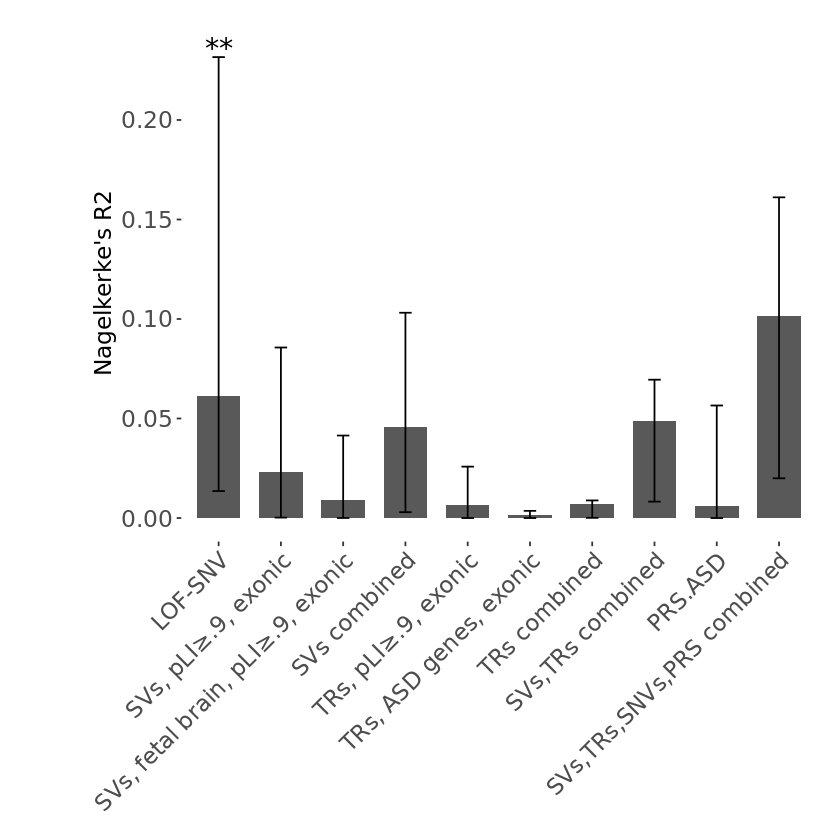

In [12]:
zs_thr = 3
#supp_thr = 2
supp_thr = 3
q_suf = '_Q'
ncpus = 8 

#BOOTSTRAP = FALSE
BOOTSTRAP = TRUE
BS_N = 10000

fig_suf = paste0('_supp', supp_thr, '_N', BS_N)

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()


### version clean:
sv_fts = c('PLIp9_cds + PLIp9_utr', 
           'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr', 
           'PLIp9_cds + PLIp9_utr + PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
sv_labels = c('SVs, pLI≥.9, exonic', 'SVs, fetal brain, pLI≥.9, exonic', 'SVs combined')

### version clean:
tr_fts = c('PLIp9_cds + PLIp9_utr', 
           'FDR_ASD_cds + FDR_ASD_utr', 
           'PLIp9_cds + PLIp9_utr + FDR_ASD_cds + FDR_ASD_utr')
tr_labels = c('TRs, pLI≥.9, exonic', 'TRs, ASD genes, exonic', 'TRs combined')

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
##print('var_svs:')
##print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
##print('var_trs:')
##print(var_trs)

var_asd = 'PRS_ASD_Z'
var_snv = 'count_dnlof_inhlof'

vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd), collapse=' + ')
##print('vars_all:')
##print(vars_all)
vars_all_vec = unlist(strsplit(vars_all, split='+', fixed=TRUE)) # split vars with +
vars_all_vec = str_trim(vars_all_vec) # trim spaces

var_svs_trs = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)]), collapse=' + ')
##print('var_svs_trs:')
##print(var_svs_trs)

#var_scz = 'PRS_SCZ_Z'
#var_edu = 'PRS_EDU_Z'
#var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
vars = c(var_snv, var_svs, var_trs, var_svs_trs, var_asd, vars_all)
var_labels = c('LOF-SNV', sv_labels, tr_labels, 'SVs,TRs combined', 'PRS.ASD', 'SVs,TRs,SNVs,PRS combined')
##print('vars:')
##print(vars)

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
#for (i_var in length(vars):length(vars)) {

    var = vars[i_var]
    print(paste('working on var:', var))

    var_vec = unlist(strsplit(var, split='+', fixed=TRUE)) # split vars with +
    var_vec = str_trim(var_vec) # trim spaces
    ##print('var_vec:')
    ##print(var_vec)
    
    vars_null = c()
    for (var_test in vars_all_vec) {
        if (!(var_test %in% var_vec)) {
            vars_null = c(vars_null, var_test)
        }
    }
    vars_null = paste(vars_null, collapse=' + ')
    ##print('vars_null:')
    ##print(vars_null)
    
    ### clogit null
    null_formula = as.formula(paste('Phenotype ~', vars_null, '+ sex + MEAN_COVERAGE + 
                              PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    print('null_formula:')
    print(null_formula)
    #null_model <- clogit(null_formula, data = df_main)
    null_model <- clogit(null_formula, data = df_main, method="approximate")
    #loglik0 = null_model$loglik[2]
    loglik0 = logLik(null_model)

    model_formula = as.formula(paste('Phenotype ~',vars_all, 
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    print('model_formula:')
    print(model_formula)
    
    #clogit_model <- clogit(model_formula, data = df_main)
    clogit_model <- clogit(model_formula, data = df_main, method="approximate")
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(df_main) * (loglik0)))
    #print('loglikM:')
    #print(loglikM)
    #print('mcf_r2:')
    #print(mcf_r2)
    #print('cs_r2:')
    #print(cs_r2)
    #print('ngk_r2:')
    #print(ngk_r2)
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        set.seed(0)
        ##mcf_r2_stats <- boot(data=df_main, statistic=getMcFaddenR2_bootstrap, R=BS_N, 
        ##                     null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ##print(mcf_r2_stats)
        ##mcf_ste = sd(mcf_r2_stats$t)
        ##mcf_ci = boot.ci(mcf_r2_stats, type="bca")
        ##mcf_ci_lower = as.double(mcf_ci$bca[1,4])
        ##mcf_ci_upper = as.double(mcf_ci$bca[1,5])

        ngk_r2_stats <- boot(data=df_main, statistic=getNagelkerkeR2_bootstrap, R=BS_N, 
                             null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t, na.rm = TRUE)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])

        print('ngk_ste:')
        print(ngk_ste)
        print('ngk_ci:')
        print(ngk_ci)
        print('ngk_ci_lower:')
        print(ngk_ci_lower)
        print('ngk_ci_upper:')
        print(ngk_ci_upper)
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    #mcf_r2s = c(mcf_r2s, mcf_r2)
    #mcf_ci_lowers = c(mcf_ci_lowers, mcf_ci_lower)
    #mcf_ci_uppers = c(mcf_ci_uppers, mcf_ci_upper)
    #mcf_stes = c(mcf_stes, mcf_ste)
    ano_pvals = c(ano_pvals, ano_pval)
}

my_data = data.frame('variables' = vars, 'ngk_r2s' = ngk_r2s, 
                     #'mcf_r2s' = mcf_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     #'mcf_ci_lower' = mcf_ci_lowers, 'mcf_ci_upper' = mcf_ci_uppers, 'mcf_ste' = mcf_stes, 
                     'ano_pval' = ano_pvals)

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig
#print(my_data)

size_txt = 14
size_sig = 6

base_ngk <- ggplot(my_data, aes(x = vars, y = ngk_r2s)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = ngk_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_ngk)

#base_mcf <- ggplot(my_data, aes(x = vars, y = mcf_r2s)) +
#          geom_bar(stat = "identity", width = 0.7) +
#          geom_errorbar(aes(ymin = mcf_ci_lower, ymax = mcf_ci_uppers), width = 0.2) +
#          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
#          geom_text(aes(label = sig, y = mcf_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
#          labs(y = "McFadden's R2") +
#          theme(axis.text=element_text(size=size_txt),
#                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
#               axis.title.x = element_blank(),
#                axis.title.y = element_text(size=size_txt),
#                panel.background = element_blank(),
#                plot.title = element_text(hjust = 0.5, size=size_txt), 
#                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
#                #legend.position = c(0.3, 0.9),
#                #legend.text = element_text(size=size_txt),
#                #legend.title = element_text(size=size_txt)
#               ) +
#          scale_x_discrete(limits=vars, labels=var_labels) 
##+
#          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
#          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

#print(base_mcf)


if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}
print(fig_name)
ggsave(fig_name, plot=base_ngk, width = 8, height = 6)

#if (BOOTSTRAP) {
#    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden_bootstrap', fig_suf, '.png')
#} else {
#    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden', fig_suf, '.png')
#}
#print(fig_name)
#ggsave(fig_name, plot=base_mcf, width = 8, height = 6)

In [20]:
zs_thr = 3
#supp_thr = 2
supp_thr = 3
q_suf = '_Q'
ncpus = 4

fig_suf = paste0('_supp', supp_thr) 

#BOOTSTRAP = FALSE
BOOTSTRAP = TRUE
BS_N = 5000

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()


### version clean:
sv_fts = c('PLIp9_cds + PLIp9_utr', 
           'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr', 
           'PLIp9_cds + PLIp9_utr + PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
sv_labels = c('SVs, pLI≥.9, exonic', 'SVs, fetal brain, pLI≥.9, exonic', 'SVs combined')

### version clean:
tr_fts = c('PLIp9_cds + PLIp9_utr', 
           'FDR_ASD_cds + FDR_ASD_utr', 
           'PLIp9_cds + PLIp9_utr + FDR_ASD_cds + FDR_ASD_utr')
tr_labels = c('TRs, pLI≥.9, exonic', 'TRs, ASD genes, exonic', 'TRs combined')

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
##print('var_svs:')
##print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
##print('var_trs:')
##print(var_trs)

var_asd = 'PRS_ASD_Z'
var_snv = 'count_dnlof_inhlof'

vars_all = paste(c(var_snv, var_svs[length(var_svs)], var_trs[length(var_trs)], var_asd), collapse=' + ')
##print('vars_all:')
##print(vars_all)
vars_all_vec = unlist(strsplit(vars_all, split='+', fixed=TRUE)) # split vars with +
vars_all_vec = str_trim(vars_all_vec) # trim spaces

var_svs_trs = paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)]), collapse=' + ')
##print('var_svs_trs:')
##print(var_svs_trs)

#var_scz = 'PRS_SCZ_Z'
#var_edu = 'PRS_EDU_Z'
#var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
vars = c(var_snv, var_svs, var_trs, var_svs_trs, var_asd, vars_all)
var_labels = c('LOF-SNV', sv_labels, tr_labels, 'SVs,TRs combined', 'PRS.ASD', 'SVs,TRs,SNVs,PRS combined')
##print('vars:')
##print(vars)

#for (i_var in 1:length(vars)) {
for (i_var in 3:3) {
#for (i_var in length(vars):length(vars)) {

    var = vars[i_var]
    print(paste('working on var:', var))

    var_vec = unlist(strsplit(var, split='+', fixed=TRUE)) # split vars with +
    var_vec = str_trim(var_vec) # trim spaces
    ##print('var_vec:')
    ##print(var_vec)
    
    vars_null = c()
    for (var_test in vars_all_vec) {
        if (!(var_test %in% var_vec)) {
            vars_null = c(vars_null, var_test)
        }
    }
    vars_null = paste(vars_null, collapse=' + ')
    ##print('vars_null:')
    ##print(vars_null)
    
    ### clogit null
    null_formula = as.formula(paste('Phenotype ~', vars_null, '+ sex + MEAN_COVERAGE + 
                              PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    print('null_formula:')
    print(null_formula)
    null_model <- clogit(null_formula, data = df_main)
    #loglik0 = null_model$loglik[2]
    loglik0 = logLik(null_model)

    model_formula = as.formula(paste('Phenotype ~',vars_all, 
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    print('model_formula:')
    print(model_formula)
    
    clogit_model <- clogit(model_formula, data = df_main)
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(df_main) * (loglik0)))
    #print('loglikM:')
    #print(loglikM)
    #print('mcf_r2:')
    #print(mcf_r2)
    #print('cs_r2:')
    #print(cs_r2)
    #print('ngk_r2:')
    #print(ngk_r2)
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        set.seed(0)
        ##mcf_r2_stats <- boot(data=df_main, statistic=getMcFaddenR2_bootstrap, R=BS_N, 
        ##                     null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ##print(mcf_r2_stats)
        ##mcf_ste = sd(mcf_r2_stats$t)
        ##mcf_ci = boot.ci(mcf_r2_stats, type="bca")
        ##mcf_ci_lower = as.double(mcf_ci$bca[1,4])
        ##mcf_ci_upper = as.double(mcf_ci$bca[1,5])

        ngk_r2_stats <- boot(data=df_main, statistic=getNagelkerkeR2_bootstrap, R=BS_N, 
                             null_formula=null_formula, model_formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])
        print('ngk_ci:')
        print(ngk_ci)
        print('ngk_ci_lower:')
        print(ngk_ci_lower)
        print('ngk_ci_upper:')
        print(ngk_ci_upper)
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    #mcf_r2s = c(mcf_r2s, mcf_r2)
    #mcf_ci_lowers = c(mcf_ci_lowers, mcf_ci_lower)
    #mcf_ci_uppers = c(mcf_ci_uppers, mcf_ci_upper)
    #mcf_stes = c(mcf_stes, mcf_ste)
    ano_pvals = c(ano_pvals, ano_pval)
}

[1] "working on var: count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr"
[1] "null_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_ZS3_PLIp9_cds_SUPP3_Q + count_ZS3_PLIp9_utr_SUPP3_Q + 
    count_ZS3_FDR_ASD_cds_SUPP3_Q + count_ZS3_FDR_ASD_utr_SUPP3_Q + 
    PRS_ASD_Z + sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)
[1] "model_formula:"
Phenotype ~ count_dnlof_inhlof + count_PLIp9_cds + count_PLIp9_utr + 
    count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr + 
    count_ZS3_PLIp9_cds_SUPP3_Q + count_ZS3_PLIp9_utr_SUPP3_Q + 
    count_ZS3_FDR_ASD_cds_SUPP3_Q + count_ZS3_FDR_ASD_utr_SUPP3_Q + 
    PRS_ASD_Z + sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)


Warning message in norm.inter(t, adj.alpha):
“extreme order statistics used as endpoints”


[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 4996 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   (-2.658,  0.089 )  
Calculations and Intervals on Original Scale
Some BCa intervals may be unstable
[1] "ngk_ci_lower:"
[1] -2.658043
[1] "ngk_ci_upper:"
[1] 0.08899061


In [ ]:
[1] "ngk_ci:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 4996 bootstrap replicates

CALL : 
boot.ci(boot.out = ngk_r2_stats, type = "bca")

Intervals : 
Level       BCa          
95%   (-57.5042,   0.0963 )  
Calculations and Intervals on Original Scale
Warning : BCa Intervals used Extreme Quantiles
Some BCa intervals may be unstable
[1] "ngk_ci_lower:"
[1] -57.50423
[1] "ngk_ci_upper:"
[1] 0.09628609

In [25]:
this_vars = c(var_snv, var_svs, var_svs_trs, var_asd, vars_all)
my_data = data.frame('variables' = vars, 'ngk_r2s' = ngk_r2s, 
                     #'mcf_r2s' = mcf_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     #'mcf_ci_lower' = mcf_ci_lowers, 'mcf_ci_upper' = mcf_ci_uppers, 'mcf_ste' = mcf_stes, 
                     'ano_pval' = ano_pvals)
my_data = my_data[,my_data$variables %in% this_vars]

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig
#print(my_data)

size_txt = 14
size_sig = 6

base_ngk <- ggplot(my_data, aes(x = vars, y = ngk_r2s)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = ngk_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_ngk)

#base_mcf <- ggplot(my_data, aes(x = vars, y = mcf_r2s)) +
#          geom_bar(stat = "identity", width = 0.7) +
#          geom_errorbar(aes(ymin = mcf_ci_lower, ymax = mcf_ci_uppers), width = 0.2) +
#          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
#          geom_text(aes(label = sig, y = mcf_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
#          labs(y = "McFadden's R2") +
#          theme(axis.text=element_text(size=size_txt),
#                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
#               axis.title.x = element_blank(),
#                axis.title.y = element_text(size=size_txt),
#                panel.background = element_blank(),
#                plot.title = element_text(hjust = 0.5, size=size_txt), 
#                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
#                #legend.position = c(0.3, 0.9),
#                #legend.text = element_text(size=size_txt),
#                #legend.title = element_text(size=size_txt)
#               ) +
#          scale_x_discrete(limits=vars, labels=var_labels) 
##+
#          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
#          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

#print(base_mcf)


if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}
#print(fig_name)
#ggsave(fig_name, plot=base_ngk, width = 8, height = 6)

#if (BOOTSTRAP) {
#    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden_bootstrap', fig_suf, '.png')
#} else {
#    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden', fig_suf, '.png')
#}
#print(fig_name)
#ggsave(fig_name, plot=base_mcf, width = 8, height = 6)

ERROR: Error in `[.data.frame`(my_data, , my_data$variables %in% this_vars): undefined columns selected


In [14]:
?clogit

clogit {survival},R Documentation
formula,Model formula
data,data frame
weights,"optional, names the variable containing case weights"
subset,"optional, subset the data"
na.action,optional na.action argument. By default the global option na.action is used.
method,use the correct (exact) calculation in the conditional likelihood or one of the approximations
...,"optional arguments, which will be passed to coxph.control"


[1] "var_svs:"
[1] "count_PLIp9_DEV_BR_GENE_10_cds"                  
[2] "count_PLIp9_utr"                                 
[3] "count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_utr"
[1] "var_trs:"
[1] "count_ZS3_PLIp9_cds_SUPP2_Q"                              
[2] "count_ZS3_PLIp9_utr_SUPP2_Q"                              
[3] "count_ZS3_PLIp9_cds_SUPP2_Q + count_ZS3_PLIp9_utr_SUPP2_Q"
[1] "count_dnlof_inhlof"
[1] "count_PLIp9_DEV_BR_GENE_10_cds"
[1] "count_PLIp9_utr"
[1] "count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_utr"
[1] "count_ZS3_PLIp9_cds_SUPP2_Q"
[1] "count_ZS3_PLIp9_utr_SUPP2_Q"
[1] "count_ZS3_PLIp9_cds_SUPP2_Q + count_ZS3_PLIp9_utr_SUPP2_Q"
[1] "PRS_ASD_Z"
[1] "PRS_SCZ_Z"
[1] "PRS_EDU_Z"
[1] "PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z"


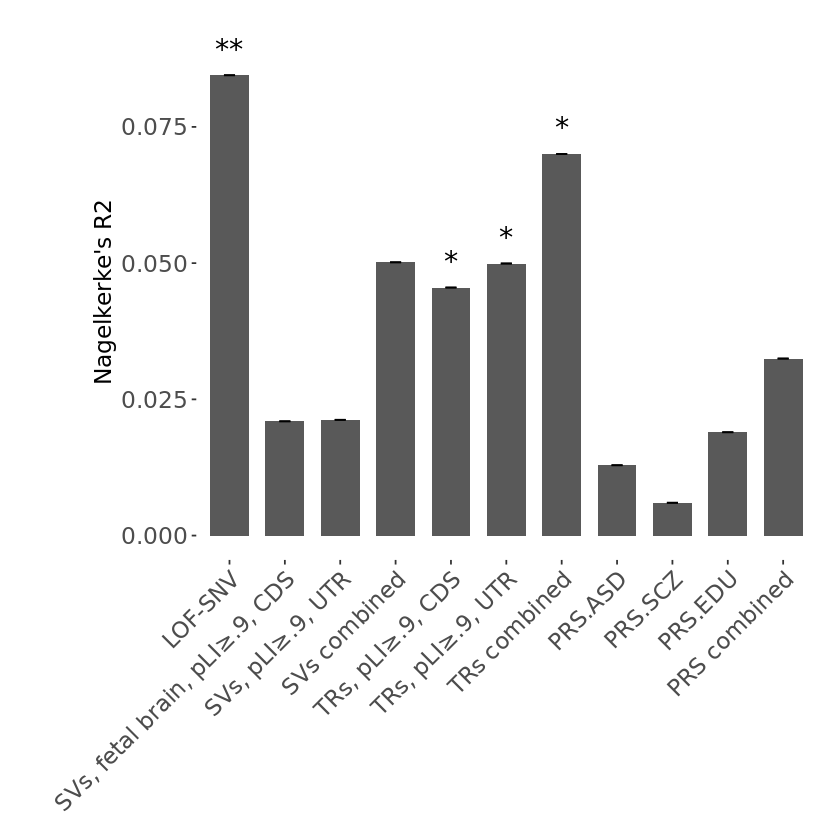

[1] "R_clogit_combined/R2_prscs_vars_Nagelkerke.png"
[1] "R_clogit_combined/R2_prscs_vars_McFadden.png"


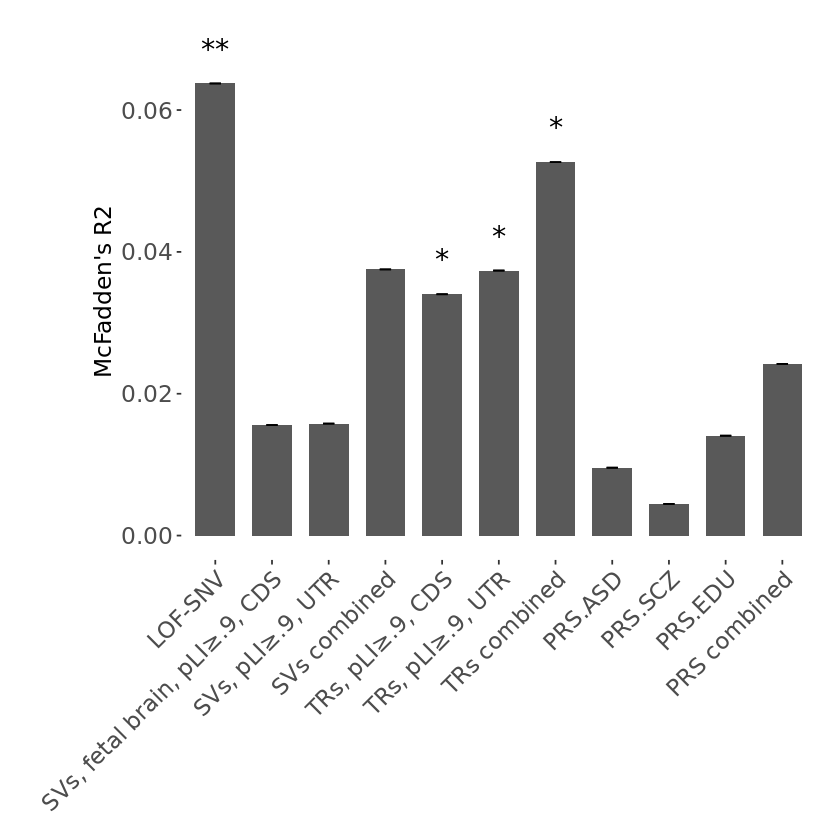

In [6]:
### Calculate R2 with clogit model and compute Nagelkerke and McFadden's R2
zs_thr = 3
supp_thr = 2
q_suf = '_Q'
ncpus = 4

BOOTSTRAP = FALSE
#BOOTSTRAP = TRUE

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()


### version clean:
fig_suf = ''
sv_fts = c('PLIp9_cds + PLIp9_utr', 
           'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr', 
           'PLIp9_cds + PLIp9_utr + PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr')
sv_labels = c('SVs, pLI≥.9, exonic', 'SVs, fetal brain, pLI≥.9, exonic', 'SVs combined')

### version clean:
tr_fts = c('PLIp9_cds + PLIp9_utr', 
           'FDR_ASD_cds + FDR_ASD_utr', 
           'PLIp9_cds + PLIp9_utr + FDR_ASD_cds + FDR_ASD_utr')
tr_labels = c('TRs, pLI≥.9, exonic', 'TRs, ASD genes, exonic', 'TRs combined')

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
print('var_svs:')
print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
print('var_trs:')
print(var_trs)

var_asd = 'PRS_ASD_Z'
var_scz = 'PRS_SCZ_Z'
var_edu = 'PRS_EDU_Z'
var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
var_snv = 'count_dnlof_inhlof'
vars = c(var_snv, var_svs, var_trs, var_asd, var_scz, var_edu, var_prs)
var_labels = c('LOF-SNV', sv_labels, tr_labels, 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU', 'PRS combined')

### clogit null
null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
null_model <- clogit(null_formula, data = df_main)
#loglik0 = null_model$loglik[2]
loglik0 = logLik(null_model)
#print('loglik0:')
#print(loglik0)
#print('null model')
#print(summary(null_model))

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
#for (i_var in length(vars):length(vars)) {
    var = vars[i_var]
    print(var)
    model_formula = as.formula(paste('Phenotype ~',var, 
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    clogit_model <- clogit(model_formula, data = df_main)
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(df_main) * (loglik0)))
    #print('loglikM:')
    #print(loglikM)
    #print('mcf_r2:')
    #print(mcf_r2)
    #print('cs_r2:')
    #print(cs_r2)
    #print('ngk_r2:')
    #print(ngk_r2)
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        mcf_r2_stats <- boot(data=df_main, statistic=getMcFaddenR2_bootstrap, R=10000, formula=model_formula, parallel="multicore", ncpus=ncpus)
        mcf_ste = sd(mcf_r2_stats$t)
        mcf_ci = boot.ci(mcf_r2_stats, type="bca")
        mcf_ci_lower = as.double(mcf_ci$bca[1,4])
        mcf_ci_upper = as.double(mcf_ci$bca[1,5])

        ngk_r2_stats <- boot(data=df_main, statistic=getNagelkerkeR2_bootstrap, R=10000, formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    mcf_r2s = c(mcf_r2s, mcf_r2)
    mcf_ci_lowers = c(mcf_ci_lowers, mcf_ci_lower)
    mcf_ci_uppers = c(mcf_ci_uppers, mcf_ci_upper)
    mcf_stes = c(mcf_stes, mcf_ste)
    ano_pvals = c(ano_pvals, ano_pval)
}

my_data = data.frame('variables' = vars, 'ngk_r2s' = ngk_r2s, 'mcf_r2s' = mcf_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     'mcf_ci_lower' = mcf_ci_lowers, 'mcf_ci_upper' = mcf_ci_uppers, 'mcf_ste' = mcf_stes, 
                     'ano_pval' = ano_pvals)

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig
#print(my_data)

size_txt = 14
size_sig = 6

base_ngk <- ggplot(my_data, aes(x = vars, y = ngk_r2s)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = ngk_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_ngk)

base_mcf <- ggplot(my_data, aes(x = vars, y = mcf_r2s)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = mcf_ci_lower, ymax = mcf_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = mcf_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "McFadden's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_mcf)


if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}
print(fig_name)
ggsave(fig_name, plot=base_ngk, width = 8, height = 6)

if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden', fig_suf, '.png')
}
print(fig_name)
ggsave(fig_name, plot=base_mcf, width = 8, height = 6)

[1] "var_svs:"
[1] "count_PLIp9_DEV_BR_GENE_10_cds"                  
[2] "count_PLIp9_utr"                                 
[3] "count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_utr"
[1] "var_trs:"
[1] "count_ZS3_FDR_ASD_cds_SUPP2_Q"                                
[2] "count_ZS3_FDR_ASD_utr_SUPP2_Q"                                
[3] "count_ZS3_FDR_ASD_cds_SUPP2_Q + count_ZS3_FDR_ASD_utr_SUPP2_Q"
[1] "vars:"
[1] "count_PLIp9_DEV_BR_GENE_10_cds"                                                                                  
[2] "count_PLIp9_utr"                                                                                                 
[3] "count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_utr"                                                                
[4] "count_ZS3_FDR_ASD_cds_SUPP2_Q"                                                                                   
[5] "count_ZS3_FDR_ASD_utr_SUPP2_Q"                                                                              

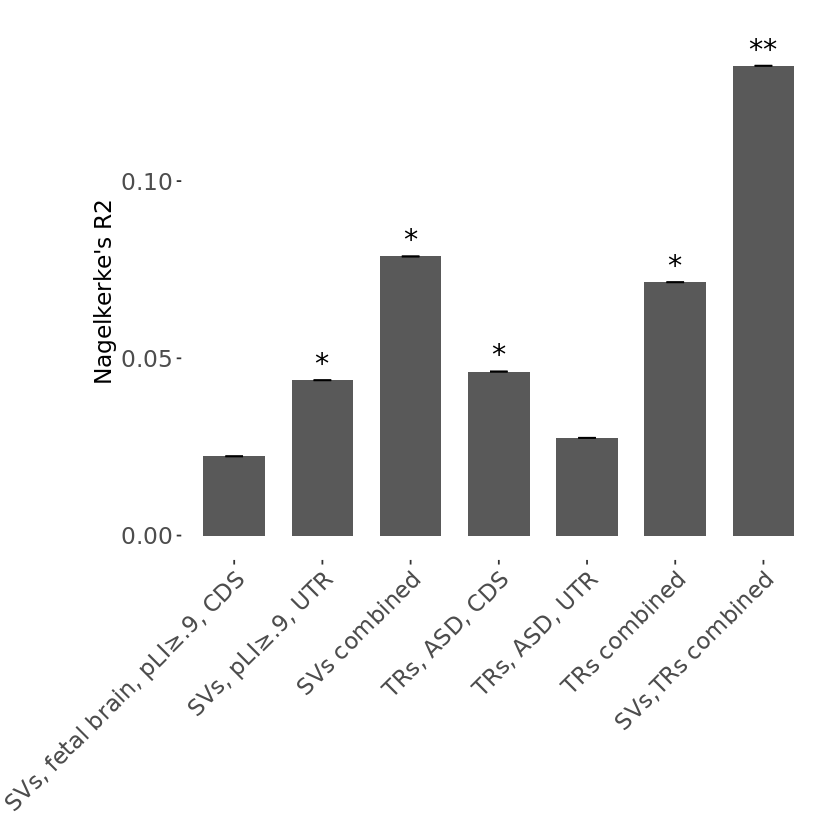

[1] "R_clogit_combined/R2_prscs_vars_Nagelkerke_snvPRScov_v2.png"
[1] "R_clogit_combined/R2_prscs_vars_McFadden_snvPRScov_v2.png"


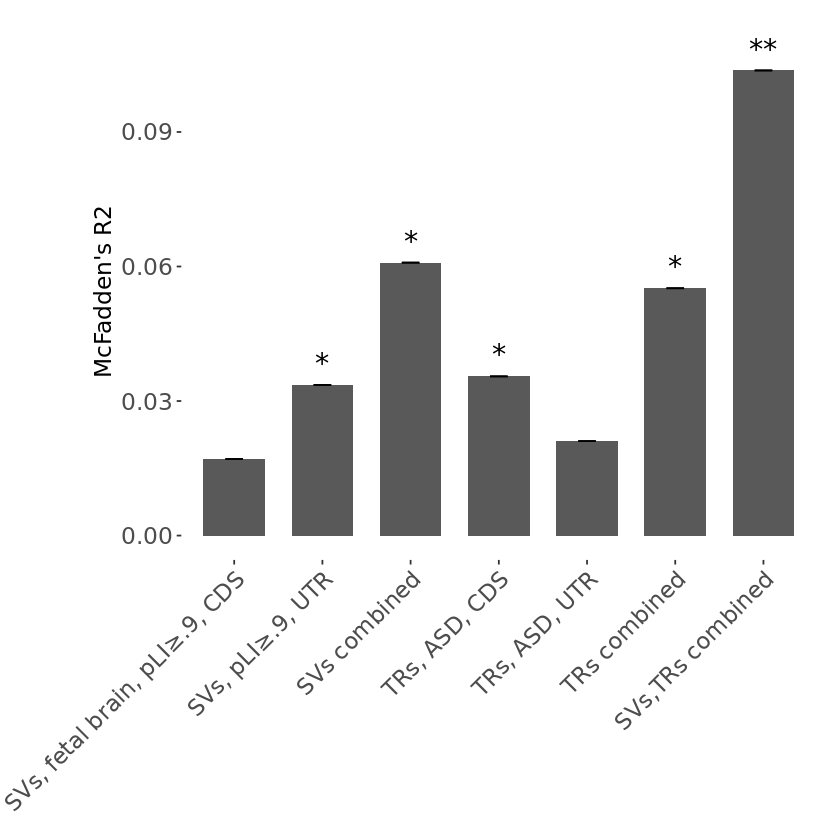

In [6]:
### Calculate R2 with clogit model and compute Nagelkerke and McFadden's R2
### this is with PRS and SNVs as covariates in the model
zs_thr = 3
supp_thr = 2
q_suf = '_Q'
ncpus = 4

BOOTSTRAP = FALSE
#BOOTSTRAP = TRUE

ver_mode = 'clean'
#ver_mode = 'inv'

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()

if (ver_mode == 'clean') {
    ### version clean:
    #**fig_suf = '_snvPRScov'
    #**sv_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_utr', 
    #**           'PLIp9_DEV_BR_GENE_10_cds + PLIp9_utr')
    #**sv_labels = c('SVs, fetal brain, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 'SVs combined')

    ### version clean:
    #**tr_fts = c('PLIp9_cds', 'PLIp9_utr', 'PLIp9_cds + PLIp9_utr')
    #**tr_labels = c('TRs, pLI≥.9, CDS', 'TRs, pLI≥.9, UTR', 'TRs combined')

    ### version clean:
    fig_suf = '_snvPRScov_v2'
    sv_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_utr', 
               'PLIp9_DEV_BR_GENE_10_cds + PLIp9_utr')
    sv_labels = c('SVs, fetal brain, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 'SVs combined')

    ### version clean:
    tr_fts = c('FDR_ASD_cds', 'FDR_ASD_utr', 'FDR_ASD_cds + FDR_ASD_utr')
    tr_labels = c('TRs, ASD, CDS', 'TRs, ASD, UTR', 'TRs combined')
    
} else if (ver_mode == 'inv') {
    ### version investigate:
    fig_suf = '_snvPRScov_inv'
    sv_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_utr', 
               'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr',
               'PLIp9_cds', 'PLIp9_utr', 
               'PLIp9_cds + PLIp9_utr', 
               'PLIp9_LOF_DEV_BR_10_cds', 'PLIp9_nonLOF_DEV_BR_10_cds', 
               'PLIp9_LOF_DEV_BR_10_cds + PLIp9_nonLOF_DEV_BR_10_cds')
    sv_labels = c('SVs, fetal brain, pLI≥.9, CDS', 'SVs, fetal brain, pLI≥.9, UTR', 'SVs combined1', 
                  'SVs, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 'SVs combined2', 
                  'SVs, fetal brain, pLI≥.9, LOF CDS', 'SVs, fetal brain, pLI≥.9, non-LOF CDS', 'SVs combined3')

    ### version investigate:
    tr_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_utr', 
               'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr',
               'PLIp9_cds', 'PLIp9_utr', 'PLIp9_cds + PLIp9_utr',
               'FDR_ASD_cds', 'FDR_ASD_utr', 'FDR_ASD_cds + FDR_ASD_utr')
    tr_labels = c('TRs, fetal brain, pLI≥.9, CDS', 'TRs, fetal brain, pLI≥.9, UTR', 'TRs combined1', 
                  'TRs, pLI≥.9, CDS', 'TRs, pLI≥.9, UTR', 'TRs combined2', 
                  'TRs, ASD, CDS', 'TRs, ASD, UTR', 'TRs combined3')
}

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
print('var_svs:')
print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
print('var_trs:')
print(var_trs)

#var_asd = 'PRS_ASD_Z'
#var_scz = 'PRS_SCZ_Z'
#var_edu = 'PRS_EDU_Z'
#var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
#var_snv = 'count_dnlof_inhlof'
#vars = c(var_snv, var_svs, var_trs, var_asd, var_scz, var_edu, var_prs)
#var_labels = c('LOF-SNV', sv_labels, tr_labels, 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU', 'PRS combined')

vars = c(var_svs, var_trs)
var_labels = c(sv_labels, tr_labels)

if (ver_mode == 'clean') {
    var_sv_tr = c(paste(c(var_svs[length(var_svs)], var_trs[length(var_trs)]), collapse=' + '))
    vars = c(vars, var_sv_tr)
    var_labels = c(var_labels, 'SVs,TRs combined')
}
print('vars:')
print(vars)

### clogit null
null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z + count_dnlof_inhlof +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
null_model <- clogit(null_formula, data = df_main)
#loglik0 = null_model$loglik[2]
loglik0 = logLik(null_model)
#print('loglik0:')
#print(loglik0)
print('null model')
print(summary(null_model))

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
#for (i_var in length(vars):length(vars)) {
    var = vars[i_var]
    print(var)
    model_formula = as.formula(paste('Phenotype ~',var, 
                                     '+ sex + MEAN_COVERAGE + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z + count_dnlof_inhlof + 
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    clogit_model <- clogit(model_formula, data = df_main)
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(df_main) * (loglik0)))
    #print('loglikM:')
    #print(loglikM)
    #print('mcf_r2:')
    #print(mcf_r2)
    #print('cs_r2:')
    #print(cs_r2)
    #print('ngk_r2:')
    #print(ngk_r2)
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        mcf_r2_stats <- boot(data=df_main, statistic=getMcFaddenR2_bootstrap, R=10000, formula=model_formula, parallel="multicore", ncpus=ncpus)
        mcf_ste = sd(mcf_r2_stats$t)
        mcf_ci = boot.ci(mcf_r2_stats, type="bca")
        mcf_ci_lower = as.double(mcf_ci$bca[1,4])
        mcf_ci_upper = as.double(mcf_ci$bca[1,5])

        ngk_r2_stats <- boot(data=df_main, statistic=getNagelkerkeR2_bootstrap, R=10000, formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    mcf_r2s = c(mcf_r2s, mcf_r2)
    mcf_ci_lowers = c(mcf_ci_lowers, mcf_ci_lower)
    mcf_ci_uppers = c(mcf_ci_uppers, mcf_ci_upper)
    mcf_stes = c(mcf_stes, mcf_ste)
    ano_pvals = c(ano_pvals, ano_pval)
}

my_data = data.frame('variables' = vars, 'ngk_r2s' = ngk_r2s, 'mcf_r2s' = mcf_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     'mcf_ci_lower' = mcf_ci_lowers, 'mcf_ci_upper' = mcf_ci_uppers, 'mcf_ste' = mcf_stes, 
                     'ano_pval' = ano_pvals)

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig
#print(my_data)

size_txt = 14
size_sig = 6

base_ngk <- ggplot(my_data, aes(x = vars, y = ngk_r2s)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = ngk_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_ngk)

base_mcf <- ggplot(my_data, aes(x = vars, y = mcf_r2s)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = mcf_ci_lower, ymax = mcf_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = mcf_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "McFadden's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_mcf)


if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}
print(fig_name)
ggsave(fig_name, plot=base_ngk, width = 8, height = 6)

if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden', fig_suf, '.png')
}
print(fig_name)
ggsave(fig_name, plot=base_mcf, width = 8, height = 6)

[1] "var_svs:"
[1] "count_PLIp9_DEV_BR_GENE_10_cds"                  
[2] "count_PLIp9_utr"                                 
[3] "count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_utr"
[1] "var_trs:"
[1] "count_ZS3_PLIp9_cds_SUPP2_Q + count_ZS3_PLIp9_utr_SUPP2_Q"
[1] "null model"
Call:
coxph(formula = Surv(rep(1, 243L), Phenotype) ~ count_ZS3_PLIp9_cds_SUPP2_Q + 
    count_ZS3_PLIp9_utr_SUPP2_Q + sex + MEAN_COVERAGE + PRS_ASD_Z + 
    PRS_SCZ_Z + PRS_EDU_Z + count_dnlof_inhlof + PC1 + PC2 + 
    PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid), 
    data = df_main, method = "exact")

  n= 243, number of events= 80 

                                  coef  exp(coef)   se(coef)      z Pr(>|z|)
count_ZS3_PLIp9_cds_SUPP2_Q  1.679e-01  1.183e+00  1.231e-01  1.364 0.172624
count_ZS3_PLIp9_utr_SUPP2_Q  1.490e-01  1.161e+00  1.233e-01  1.209 0.226765
sexMale                      1.277e+00  3.587e+00  3.702e-01  3.451 0.000559
MEAN_COVERAGE               -6.084e-02  9.410e-01  8.074e-02 

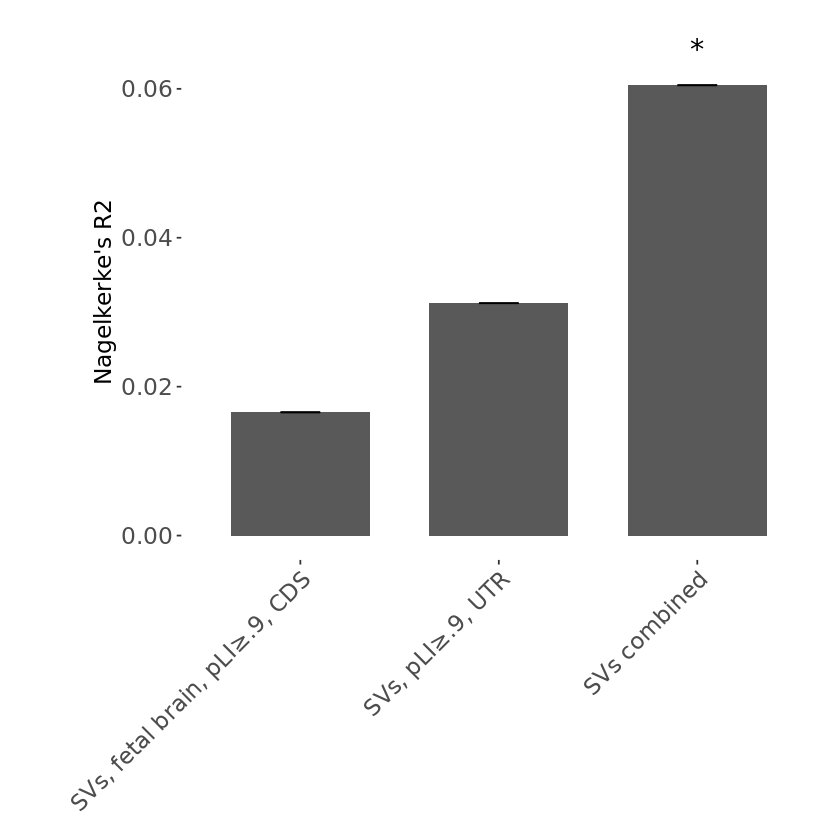

[1] "R_clogit_combined/R2_sbayesr_vars_Nagelkerke_snvPRStrcov.png"
[1] "R_clogit_combined/R2_sbayesr_vars_McFadden_snvPRStrcov.png"


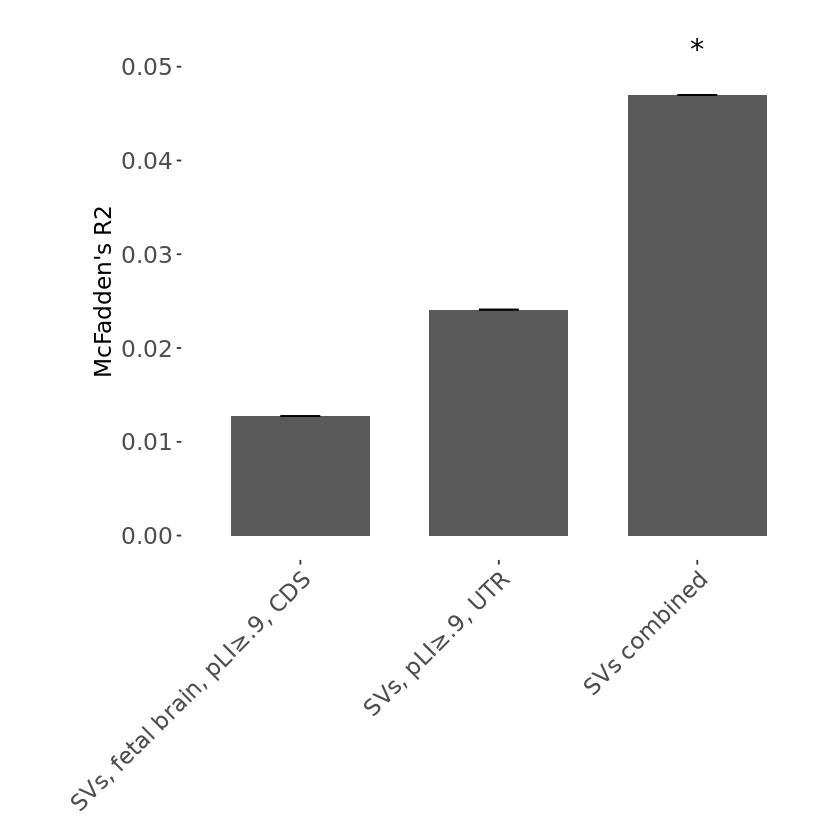

In [10]:
### Calculate R2 with clogit model and compute Nagelkerke and McFadden's R2
### this is with PRS and SNVs and TRs as covariates in the model
zs_thr = 3
supp_thr = 2
q_suf = '_Q'
ncpus = 4

BOOTSTRAP = FALSE
#BOOTSTRAP = TRUE

ver_mode = 'clean'
#ver_mode = 'inv'

ngk_r2s = c()
ngk_ci_lowers = c()
ngk_ci_uppers = c()
ngk_stes = c()
mcf_r2s = c()
mcf_ci_lowers = c()
mcf_ci_uppers = c()
mcf_stes = c()
ano_pvals = c()

if (ver_mode == 'clean') {
    ### version clean:
    fig_suf = '_snvPRStrcov'
    sv_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_utr', 
               'PLIp9_DEV_BR_GENE_10_cds + PLIp9_utr')
    sv_labels = c('SVs, fetal brain, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 'SVs combined')

    ### version clean:
    #tr_fts = c('PLIp9_cds', 'PLIp9_utr', 'PLIp9_cds + PLIp9_utr')
    #tr_labels = c('TRs, pLI≥.9, CDS', 'TRs, pLI≥.9, UTR', 'TRs combined')
    tr_fts = c('PLIp9_cds + PLIp9_utr')
    tr_labels = c()
    
} else if (ver_mode == 'inv') {
    ### version investigate:
    fig_suf = '_snvPRStrcov_inv'
    sv_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_utr', 
               'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr',
               'PLIp9_cds', 'PLIp9_utr', 
               'PLIp9_cds + PLIp9_utr', 
               'PLIp9_LOF_DEV_BR_10_cds', 'PLIp9_nonLOF_DEV_BR_10_cds', 
               'PLIp9_LOF_DEV_BR_10_cds + PLIp9_nonLOF_DEV_BR_10_cds')
    sv_labels = c('SVs, fetal brain, pLI≥.9, CDS', 'SVs, fetal brain, pLI≥.9, UTR', 'SVs combined1', 
                  'SVs, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 'SVs combined2', 
                  'SVs, fetal brain, pLI≥.9, LOF CDS', 'SVs, fetal brain, pLI≥.9, non-LOF CDS', 'SVs combined3')

    ### version investigate:
    #tr_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_utr', 
    #           'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr',
    #           'PLIp9_cds', 'PLIp9_utr', 'PLIp9_cds + PLIp9_utr',
    #           'FDR_ASD_cds', 'FDR_ASD_utr', 'FDR_ASD_cds + FDR_ASD_utr')
    #tr_labels = c('TRs, fetal brain, pLI≥.9, CDS', 'TRs, fetal brain, pLI≥.9, UTR', 'TRs combined1', 
    #              'TRs, pLI≥.9, CDS', 'TRs, pLI≥.9, UTR', 'TRs combined2', 
    #              'TRs, ASD, CDS', 'TRs, ASD, UTR', 'TRs combined3')
    tr_fts = c('PLIp9_cds + PLIp9_utr')
    tr_labels = c()
}

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
print('var_svs:')
print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
print('var_trs:')
print(var_trs)

#var_asd = 'PRS_ASD_Z'
#var_scz = 'PRS_SCZ_Z'
#var_edu = 'PRS_EDU_Z'
#var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
#var_snv = 'count_dnlof_inhlof'
#vars = c(var_snv, var_svs, var_trs, var_asd, var_scz, var_edu, var_prs)
#var_labels = c('LOF-SNV', sv_labels, tr_labels, 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU', 'PRS combined')

#vars = c(var_svs, var_trs)
#var_labels = c(sv_labels, tr_labels)
vars = c(var_svs)
var_labels = c(sv_labels)

### clogit null
null_formula = as.formula(paste('Phenotype ~', var_trs, '+ sex + MEAN_COVERAGE + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z + count_dnlof_inhlof +
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
null_model <- clogit(null_formula, data = df_main)
#loglik0 = null_model$loglik[2]
loglik0 = logLik(null_model)
#print('loglik0:')
#print(loglik0)
print('null model')
print(summary(null_model))

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
#for (i_var in length(vars):length(vars)) {
    var = vars[i_var]
    print(var)
    model_formula = as.formula(paste('Phenotype ~',var, '+', var_trs,
                                     '+ sex + MEAN_COVERAGE + PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z + count_dnlof_inhlof +
                                     PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))
    print('model_formula:')
    print(model_formula)
    clogit_model <- clogit(model_formula, data = df_main)
    ### compute McFadden's R2: 1 - logL(M)/logL(0)
    #this_R2 = 1.0 - (clogit_model$loglik[2] / loglik0)
    loglikM = logLik(clogit_model)
    mcf_r2 = 1.0 - (loglikM / loglik0)
    cs_r2 = 1.0 - exp(2/nrow(df_main) * (loglik0 - loglikM))
    ngk_r2 = cs_r2 / (1.0 - exp(2/nrow(df_main) * (loglik0)))
    #print('loglikM:')
    #print(loglikM)
    #print('mcf_r2:')
    #print(mcf_r2)
    #print('cs_r2:')
    #print(cs_r2)
    #print('ngk_r2:')
    #print(ngk_r2)
    
    # compute anova pvalue
    ano <- anova(null_model, clogit_model, test='LRT')
    ano_pval = ano$"Pr(>|Chi|)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        mcf_r2_stats <- boot(data=df_main, statistic=getMcFaddenR2_bootstrap, R=10000, formula=model_formula, parallel="multicore", ncpus=ncpus)
        mcf_ste = sd(mcf_r2_stats$t)
        mcf_ci = boot.ci(mcf_r2_stats, type="bca")
        mcf_ci_lower = as.double(mcf_ci$bca[1,4])
        mcf_ci_upper = as.double(mcf_ci$bca[1,5])

        ngk_r2_stats <- boot(data=df_main, statistic=getNagelkerkeR2_bootstrap, R=10000, formula=model_formula, parallel="multicore", ncpus=ncpus)
        ngk_ste = sd(ngk_r2_stats$t)
        ngk_ci = boot.ci(ngk_r2_stats, type="bca")
        ngk_ci_lower = as.double(ngk_ci$bca[1,4])
        ngk_ci_upper = as.double(ngk_ci$bca[1,5])
    }
    else {
        mcf_ste = 0
        mcf_ci_lower = mcf_r2
        mcf_ci_upper = mcf_r2
        
        ngk_ste = 0
        ngk_ci_lower = ngk_r2
        ngk_ci_upper = ngk_r2
        
    }
    ngk_r2s = c(ngk_r2s, ngk_r2)
    ngk_ci_lowers = c(ngk_ci_lowers, ngk_ci_lower)
    ngk_ci_uppers = c(ngk_ci_uppers, ngk_ci_upper)
    ngk_stes = c(ngk_stes, ngk_ste)
    mcf_r2s = c(mcf_r2s, mcf_r2)
    mcf_ci_lowers = c(mcf_ci_lowers, mcf_ci_lower)
    mcf_ci_uppers = c(mcf_ci_uppers, mcf_ci_upper)
    mcf_stes = c(mcf_stes, mcf_ste)
    ano_pvals = c(ano_pvals, ano_pval)
}

my_data = data.frame('variables' = vars, 'ngk_r2s' = ngk_r2s, 'mcf_r2s' = mcf_r2s, 
                     'ngk_ci_lower' = ngk_ci_lowers, 'ngk_ci_upper' = ngk_ci_uppers, 'ngk_ste' = ngk_stes, 
                     'mcf_ci_lower' = mcf_ci_lowers, 'mcf_ci_upper' = mcf_ci_uppers, 'mcf_ste' = mcf_stes, 
                     'ano_pval' = ano_pvals)

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig
#print(my_data)

size_txt = 14
size_sig = 6

base_ngk <- ggplot(my_data, aes(x = vars, y = ngk_r2s)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = ngk_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_ngk)

base_mcf <- ggplot(my_data, aes(x = vars, y = mcf_r2s)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = mcf_ci_lower, ymax = mcf_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = mcf_ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "McFadden's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base_mcf)


if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}
print(fig_name)
ggsave(fig_name, plot=base_ngk, width = 8, height = 6)

if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_McFadden', fig_suf, '.png')
}
print(fig_name)
ggsave(fig_name, plot=base_mcf, width = 8, height = 6)

[1] "var_svs:"
[1] "count_PLIp9_DEV_BR_GENE_10_cds"   "count_PLIp9_DEV_BR_GENE_10_utr"  
[3] "count_PLIp9_cds"                  "count_PLIp9_utr"                 
[5] "count_PLIp9_LOF_DEV_BR_10_cds"    "count_PLIp9_nonLOF_DEV_BR_10_cds"
[1] "var_trs:"
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP2_Q"
[2] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP2_Q"
[3] "count_ZS3_PLIp9_cds_SUPP2_Q"               
[4] "count_ZS3_PLIp9_utr_SUPP2_Q"               
[5] "count_ZS3_FDR_ASD_cds_SUPP2_Q"             
[6] "count_ZS3_FDR_ASD_utr_SUPP2_Q"             
[1] "vars:"
 [1] "count_PLIp9_DEV_BR_GENE_10_cds"            
 [2] "count_PLIp9_DEV_BR_GENE_10_utr"            
 [3] "count_PLIp9_cds"                           
 [4] "count_PLIp9_utr"                           
 [5] "count_PLIp9_LOF_DEV_BR_10_cds"             
 [6] "count_PLIp9_nonLOF_DEV_BR_10_cds"          
 [7] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP2_Q"
 [8] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP2_Q"
 [9] "count_ZS3_PLIp9_cds_SUPP2_Q"        

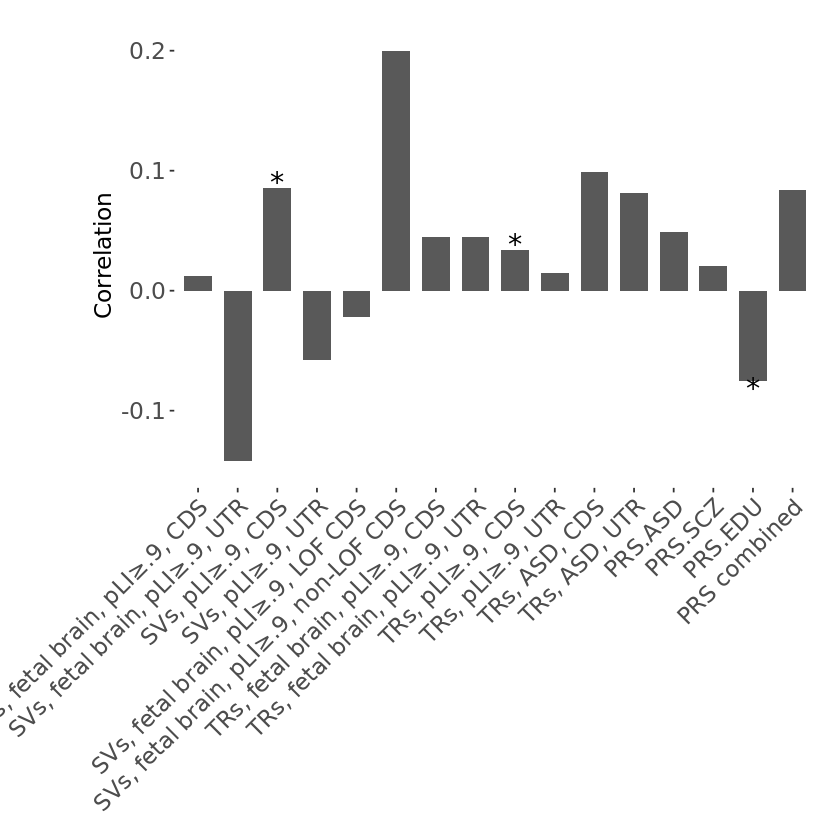

In [10]:
### investigate the correlation of SV, TR and PRS variables, with SNVs
zs_thr = 3
supp_thr = 2
q_suf = '_Q'
ncpus = 4

#ver_mode = 'clean'
ver_mode = 'inv'

cors = c()
pvals = c()

if (ver_mode == 'clean') {
    ### version clean:
    fig_suf = ''
    sv_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_utr', 
               'PLIp9_DEV_BR_GENE_10_cds + PLIp9_utr')
    sv_labels = c('SVs, fetal brain, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 'SVs combined')

    ### version clean:
    tr_fts = c('PLIp9_cds', 'PLIp9_utr', 'PLIp9_cds + PLIp9_utr')
    tr_labels = c('TRs, pLI≥.9, CDS', 'TRs, pLI≥.9, UTR', 'TRs combined')
    
} else if (ver_mode == 'inv') {
    ### version investigate:
    fig_suf = '_inv'
    sv_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_utr', 
               'PLIp9_cds', 'PLIp9_utr', 
               'PLIp9_LOF_DEV_BR_10_cds', 'PLIp9_nonLOF_DEV_BR_10_cds')
    sv_labels = c('SVs, fetal brain, pLI≥.9, CDS', 'SVs, fetal brain, pLI≥.9, UTR', 
                  'SVs, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 
                  'SVs, fetal brain, pLI≥.9, LOF CDS', 'SVs, fetal brain, pLI≥.9, non-LOF CDS')

    ### version investigate:
    tr_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_utr', 
               'PLIp9_cds', 'PLIp9_utr',
               'FDR_ASD_cds', 'FDR_ASD_utr')
    tr_labels = c('TRs, fetal brain, pLI≥.9, CDS', 'TRs, fetal brain, pLI≥.9, UTR', 
                  'TRs, pLI≥.9, CDS', 'TRs, pLI≥.9, UTR', 
                  'TRs, ASD, CDS', 'TRs, ASD, UTR')
}

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
print('var_svs:')
print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
print('var_trs:')
print(var_trs)

var_asd = 'PRS_ASD_Z'
var_scz = 'PRS_SCZ_Z'
var_edu = 'PRS_EDU_Z'
var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
var_snv = 'count_dnlof_inhlof'
vars = c(var_svs, var_trs, var_asd, var_scz, var_edu, var_prs)
var_labels = c(sv_labels, tr_labels, 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU', 'PRS combined')

print('vars:')
print(vars)
#vars = c(var_svs, var_trs)
#var_labels = c(sv_labels, tr_labels)
#vars = c(var_svs)
#var_labels = c(sv_labels)

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
    var = vars[i_var]
    print(var)
    formula = as.formula(paste(var_snv, '~', var))
    model <- lm(formula = formula, data = df_main)
    cor <- as.double(model$coefficients[2])
    pval <- summary(model)$coefficients[2,4]
    cors = c(cors, cor)
    pvals = c(pvals, pval)
    #print('cor:')
    #print(cor)
    #print('pval:')
    #print(pval)
    
    #print(summary(model))
    #print(str(summary(model)))
    #print(str(model))
    #print('model$coefficients[2]:')
    #print(as.double(model$coefficients[2]))
}

my_data = data.frame('variables' = vars, 'cor' = cors, 'pval' = pvals)

sig <- sapply(my_data$pval, get_pval_char)
my_data$sig = sig
print(my_data)

size_txt = 14
size_sig = 6

base <- ggplot(my_data, aes(x = vars, y = cor)) +
          geom_bar(stat = "identity", width = 0.7) +
          #geom_errorbar(aes(ymin = ngk_ci_lower, ymax = ngk_ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = cor+0.005*sign(cor)), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Correlation") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base)

fig_name = paste0(dir_fig, 'correlation_with_SNVs_', prs_mode, fig_suf, '.png')
print(fig_name)
ggsave(fig_name, plot=base, width = 8, height = 6)

[1] "count_dnlof_inhlof"
[1] "Nagelkerge R2:"
[1] 0.03877672
[1] "count_PLIp9_DEV_BR_GENE_10_cds"
[1] "Nagelkerge R2:"
[1] 0.002988749
[1] "count_PLIp9_DEV_BR_GENE_10_utr"
[1] "Nagelkerge R2:"
[1] 0.007045427
[1] "count_PLIp9_DEV_BR_GENE_10_cds + count_PLIp9_DEV_BR_GENE_10_utr"
[1] "Nagelkerge R2:"
[1] 0.009112195
[1] "count_PLIp9_cds"
[1] "Nagelkerge R2:"
[1] 0.004527912
[1] "count_PLIp9_utr"
[1] "Nagelkerge R2:"
[1] 0.0217138
[1] "count_PLIp9_cds + count_PLIp9_utr"
[1] "Nagelkerge R2:"
[1] 0.02417108
[1] "count_PLIp9_LOF_DEV_BR_10_cds"
[1] "Nagelkerge R2:"
[1] 0.0006957868
[1] "count_PLIp9_nonLOF_DEV_BR_10_cds"
[1] "Nagelkerge R2:"
[1] 0.006048793
[1] "count_PLIp9_LOF_DEV_BR_10_cds + count_PLIp9_nonLOF_DEV_BR_10_cds"
[1] "Nagelkerge R2:"
[1] 0.007136375
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP2_Q"
[1] "Nagelkerge R2:"
[1] 0.01893186
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_utr_SUPP2_Q"
[1] "Nagelkerge R2:"
[1] 0.002385953
[1] "count_ZS3_PLIp9_DEV_BR_GENE_10_cds_SUPP2_Q + count_ZS3_PLI

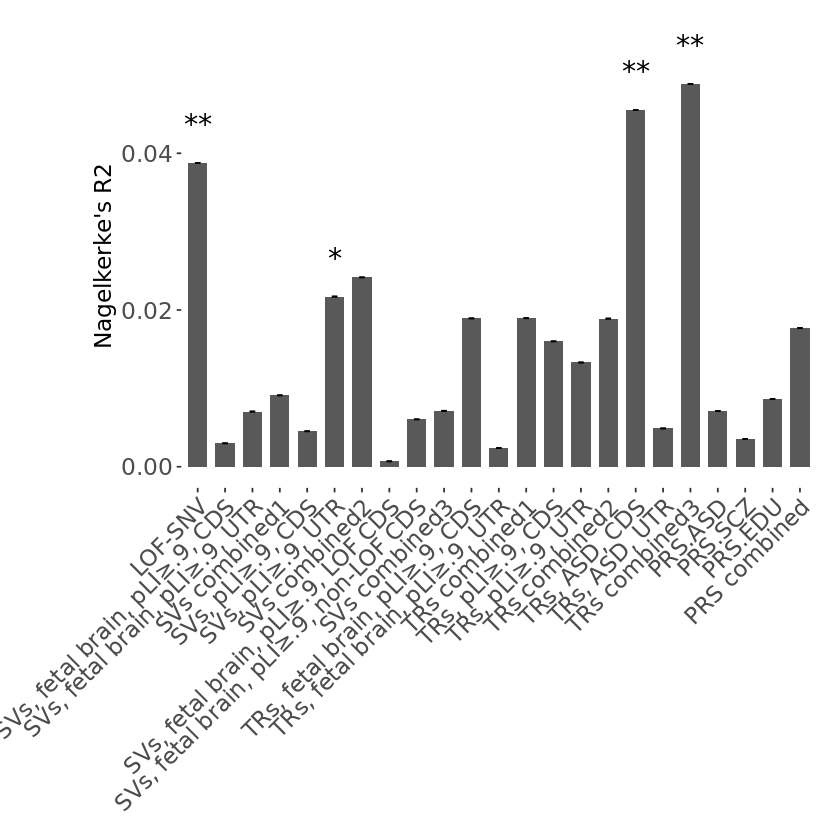

In [20]:
### Calculate R2 with glm model and Nagelkerke's R2 method
zs_thr = 3
supp_thr = 2
q_suf = '_Q'
ncpus = 4

BOOTSTRAP = FALSE
#BOOTSTRAP = TRUE

#ver_mode = 'clean'
ver_mode = 'inv'

R2s = c()
ci_lowers = c()
ci_uppers = c()
stes = c()
ano_pvals = c()

if (ver_mode == 'clean') {
    ### version clean:
    fig_suf = ''
    sv_fts = c('PLIp9_cds', 'PLIp9_utr', 
               'PLIp9_cds + PLIp9_utr')
    sv_labels = c('SVs, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 'SVs combined')

    ### version clean:
    tr_fts = c('PLIp9_cds', 'PLIp9_utr', 'PLIp9_cds + PLIp9_utr')
    tr_labels = c('TRs, pLI≥.9, CDS', 'TRs, pLI≥.9, UTR', 'TRs combined')
    
} else if (ver_mode == 'inv') {
    ### version investigate:
    fig_suf = '_inv'
    sv_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_utr', 
               'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr',
               'PLIp9_cds', 'PLIp9_utr', 
               'PLIp9_cds + PLIp9_utr', 
               'PLIp9_LOF_DEV_BR_10_cds', 'PLIp9_nonLOF_DEV_BR_10_cds', 
               'PLIp9_LOF_DEV_BR_10_cds + PLIp9_nonLOF_DEV_BR_10_cds')
    sv_labels = c('SVs, fetal brain, pLI≥.9, CDS', 'SVs, fetal brain, pLI≥.9, UTR', 'SVs combined1', 
                  'SVs, pLI≥.9, CDS', 'SVs, pLI≥.9, UTR', 'SVs combined2', 
                  'SVs, fetal brain, pLI≥.9, LOF CDS', 'SVs, fetal brain, pLI≥.9, non-LOF CDS', 'SVs combined3')

    ### version investigate:
    tr_fts = c('PLIp9_DEV_BR_GENE_10_cds', 'PLIp9_DEV_BR_GENE_10_utr', 
               'PLIp9_DEV_BR_GENE_10_cds + PLIp9_DEV_BR_GENE_10_utr',
               'PLIp9_cds', 'PLIp9_utr', 'PLIp9_cds + PLIp9_utr',
               'FDR_ASD_cds', 'FDR_ASD_utr', 'FDR_ASD_cds + FDR_ASD_utr')
    tr_labels = c('TRs, fetal brain, pLI≥.9, CDS', 'TRs, fetal brain, pLI≥.9, UTR', 'TRs combined1', 
                  'TRs, pLI≥.9, CDS', 'TRs, pLI≥.9, UTR', 'TRs combined2', 
                  'TRs, ASD, CDS', 'TRs, ASD, UTR', 'TRs combined3')
}

var_svs = c()
var_trs = c()

for (sv_ft in sv_fts) {
    # sv_ft can be one var or multiple separated with +
    var_sv = unlist(strsplit(sv_ft, split='+', fixed=TRUE)) # split vars with +
    var_sv = str_trim(var_sv) # trim spaces
    var_sv = paste0('count_', var_sv) # add count_
    var_sv = paste(var_sv, collapse=' + ') # join vars
    var_svs = c(var_svs, var_sv)
}
#print('var_svs:')
#print(var_svs)
for (tr_ft in tr_fts) {
    # tr_ft can be one var or multiple separated with +
    var_tr = unlist(strsplit(tr_ft, split='+', fixed=TRUE)) # split vars with +
    var_tr = str_trim(var_tr) # trim spaces
    var_tr = paste0('count_ZS', zs_thr, '_', var_tr, '_SUPP', supp_thr, q_suf) # add count_
    var_tr = paste(var_tr, collapse=' + ') # join vars
    var_trs = c(var_trs, var_tr)
}
#print('var_trs:')
#print(var_trs)

var_asd = 'PRS_ASD_Z'
var_scz = 'PRS_SCZ_Z'
var_edu = 'PRS_EDU_Z'
var_prs = 'PRS_ASD_Z + PRS_SCZ_Z + PRS_EDU_Z'
var_snv = 'count_dnlof_inhlof'
vars = c(var_snv, var_svs, var_trs, var_asd, var_scz, var_edu, var_prs)
var_labels = c('LOF-SNV', sv_labels, tr_labels, 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU', 'PRS combined')

### glm null
null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10')
null_model <- glm(formula = null_formula , data = df_main, family = binomial)
#print('null model')
#print(summary(null_model))

for (i_var in 1:length(vars)) {
#for (i_var in 1:1) {
    var = vars[i_var]
    print(var)
    model_formula = as.formula(paste('Phenotype ~',var, 
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10'))
    alt_model <- glm(formula = model_formula , data = df_main, family = binomial)
    ### compute Nagelkerke's R2
    this_R2 = NagelkerkeR2(alt_model)$R2 - NagelkerkeR2(null_model)$R2
    #print((NagelkerkeR2(alt_model)))
    print('Nagelkerge R2:')
    print(this_R2)
    
    # compute anova pvalue
    ano <- anova(null_model, alt_model, test='LRT')
    ano_pval = ano$"Pr(>Chi)"[2]

    # bootstapping
    if (BOOTSTRAP) {
        r2_stats <- boot(data=df_main, statistic=getNagelkerkeR2_bootstrap, R=10000, formula=model_formula, parallel="multicore", ncpus=ncpus)
        ste = sd(r2_stats$t)
        ci = boot.ci(r2_stats, type="bca")
        ci_lower = as.double(ci$bca[1,4])
        ci_upper = as.double(ci$bca[1,5])
    }
    else {
        ste = 0
        ci_lower = this_R2
        ci_upper = this_R2   
    }
    R2s = c(R2s, this_R2)
    ci_lowers = c(ci_lowers, ci_lower)
    ci_uppers = c(ci_uppers, ci_upper)
    stes = c(stes, ste)
    ano_pvals = c(ano_pvals, ano_pval)
}

my_data = data.frame('variables' = vars, 'R2' = R2s, 'ci_lower' = ci_lowers, 'ci_upper' = ci_uppers, 'ste' = stes, 'ano_pval' = ano_pvals)

sig <- sapply(my_data$ano_pval, get_pval_char)
my_data$sig = sig

size_txt = 14
size_sig = 6

base <- ggplot(my_data, aes(x = vars, y = R2)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = ci_lower, ymax = ci_uppers), width = 0.2) +
          #geom_errorbar(aes(ymin = my_data$R2 - my_data$ste, ymax = my_data$R2 + my_data$ste), width = 0.2) +
          geom_text(aes(label = sig, y = ci_uppers+0.005), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Nagelkerke's R2") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 45, vjust = 1, hjust=1, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                plot.margin = margin(t = .5, l = 2, r = .5, b = .5, "cm"),
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base)

if (BOOTSTRAP) {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke_bootstrap', fig_suf, '.png')
} else {
    fig_name = paste0(dir_fig, 'R2_', prs_mode, '_vars_Nagelkerke', fig_suf, '.png')
}
print(fig_name)
ggsave(fig_name, width = 8, height = 6)

In [5]:
### clean features
fts = c(#'LOF_FDR_ASD_cds',
        #'PLIp9_LOF_DEV_BR_10_cds',
        #'LOF_DEV_BR_10_cds',
        #'LOF_PLIp9_cds', 
        #'LOF_LOWPLI_cds',
        #'FDR_ASD_cds', 
        'PLIp9_DEV_BR_GENE_10_cds', 
        'DEV_BR_GENE_10_cds', 
        'PLIp9_cds', 
        'LOWPLI_cds',
        #'EV_CONS_EL_FRAC_10_cds',
        #'S_HET_10_cds',
        #'FDR_ASD_utr',
        'PLIp9_DEV_BR_GENE_10_utr',
        'DEV_BR_GENE_10_utr', 
        'PLIp9_utr', 
        'LOWPLI_utr',
        #'EV_CONS_EL_FRAC_10_utr',
        #'S_HET_10_utr',
        #'FDR_ASD_intron', 
        'PLIp9_DEV_BR_GENE_10_intron',
        'DEV_BR_GENE_10_intron', 
        'PLIp9_intron', 
        'LOWPLI_intron',
        #'EV_CONS_EL_FRAC_10_ncd',
        #'S_HET_10_intron',
        'GNOCCHI_MAX_3', 'GNOCCHI_MAX_2')
fts_labels = c(#'LOF ASD FDR, CDS',
               #'LOF dev. brain pLI≥.9 genes, CDS', 
               #'LOF dev. brain genes, CDS', 
               #'LOF pLI≥.9, CDS', 
               #'LOF pLI≤.9, CDS',
               #'ASD FDR, CDS', 
               'dev. brain pLI≥.9 genes, CDS', 
               'dev. brain genes, CDS', 
               'pLI≥.9, CDS', 
               'pLI≤.9, CDS',
               #'Evol. Consv. frc≥.1, CDS',
               #'S het≥0.01, CDS',
               #'ASD FDR, UTR',
               'dev. brain pLI≥.9 genes, UTR',
               'dev. brain genes, UTR', 
               'pLI≥.9, UTR', 
               'pLI≤.9, UTR',
               #'Evol. Consv. frc≥.1, UTR',
               #'S het≥0.01, UTR',
               #'ASD FDR, intron',
               'dev. brain pLI≥.9 genes, intron',
               'dev. brain genes, intron', 
               'pLI≥.9, intron', 
               'pLI≤.9, intron', 
               #'Evol. Consv. frc≥.1, non-CD',
               #'S het≥0.01, intron',
               'Gnocchi≥3', 'Gnocchi≥2')

[1] "count_PLIp9_DEV_BR_GENE_10_cds"
[1] "null model"
Call:
coxph(formula = Surv(rep(1, 243L), Phenotype) ~ sex + MEAN_COVERAGE + 
    PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + 
    strata(fid), data = df_main, method = "exact")

  n= 243, number of events= 80 

                    coef  exp(coef)   se(coef)      z Pr(>|z|)    
sexMale        1.161e+00  3.192e+00  3.278e-01  3.541 0.000399 ***
MEAN_COVERAGE -2.085e-02  9.794e-01  6.982e-02 -0.299 0.765170    
PC1            1.365e+01  8.511e+05  1.149e+01  1.188 0.234662    
PC2           -1.483e+01  3.616e-07  1.408e+01 -1.054 0.292032    
PC3            1.326e+00  3.766e+00  4.898e+00  0.271 0.786617    
PC4           -5.190e+00  5.572e-03  1.202e+01 -0.432 0.665915    
PC5           -4.836e+00  7.942e-03  1.122e+01 -0.431 0.666388    
PC6            9.538e+00  1.388e+04  2.474e+01  0.386 0.699793    
PC7           -7.034e-01  4.949e-01  1.371e+01 -0.051 0.959095    
PC8           -5.317e+00  4.908e-03  1.738e+01 -

     loglik           Chisq             Df      Pr(>|Chi|)      
 Min.   :-77.46   Min.   :19.09   Min.   :6   Min.   :0.004011  
 1st Qu.:-75.08   1st Qu.:19.09   1st Qu.:6   1st Qu.:0.004011  
 Median :-72.69   Median :19.09   Median :6   Median :0.004011  
 Mean   :-72.69   Mean   :19.09   Mean   :6   Mean   :0.004011  
 3rd Qu.:-70.30   3rd Qu.:19.09   3rd Qu.:6   3rd Qu.:0.004011  
 Max.   :-67.92   Max.   :19.09   Max.   :6   Max.   :0.004011  
                  NA's   :1       NA's   :1   NA's   :1         

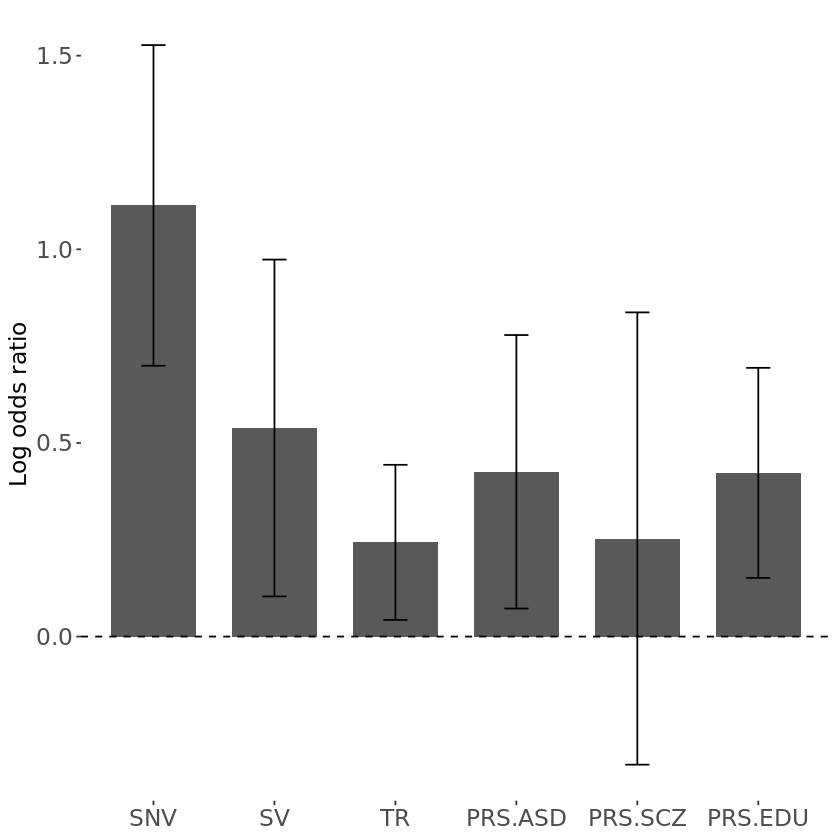

In [11]:
zs_thr = 3
supp_thr = 2
q_suf = '_Q'

null_formula = as.formula('Phenotype ~ sex + MEAN_COVERAGE + 
                          PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)')
log_ORs = c()
log_ORs_plus = c()
log_ORs_minus = c()
pvals = c()

#for (ft in fts) {
ft = fts[1]
var_sv = paste0('count_', ft)
var_tr = paste0('count_ZS', zs_thr, '_', ft, '_SUPP', supp_thr, q_suf)
var_asd = 'PRS_ASD_Z'
var_scz = 'PRS_SCZ_Z'
var_edu = 'PRS_EDU_Z'
var_snv = 'count_dnlof_inhlof'
vars = c(var_snv, var_sv, var_tr, var_asd, var_scz, var_edu)
var_labels = c('SNV', 'SV', 'TR', 'PRS.ASD', 'PRS.SCZ', 'PRS.EDU')
print(var_sv)

#sum_case = sum(df_main[df_main$Phenotype==1,][,var])
#sum_control = sum(df_main[df_main$Phenotype==0,][,var])
#sum_cases = c(sum_cases, sum_case)
#sum_controls = c(sum_controls, sum_control)
        
model_formula = as.formula(paste('Phenotype ~',var_snv, '+', var_sv, '+', var_tr, '+', var_asd, '+', var_scz, '+', var_edu, 
                                 '+ sex + MEAN_COVERAGE + PC1 + PC2 + PC3 + PC4 + PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + strata(fid)'))

#'+', var_tr, '+', var_asd, '+', var_scz, '+', var_edu,
# var_sv, '+', var_snv, '+', var_tr, '+', 
null_model <- clogit(null_formula, data = df_main)
print('null model')
print(summary(null_model))
#NagelkerkeR2(null_model)
    
clogit_model <- clogit(model_formula, data = df_main)
print('clogit model')
print(summary(clogit_model))
print(str(summary(clogit_model)))

for (var in vars) {
    log_OR = summary(clogit_model)$coefficients[var, 'coef']
    log_OR_plus = summary(clogit_model)$coefficients[var, 'coef'] + summary(clogit_model)$coefficients[var, 'se(coef)']
    log_OR_minus = summary(clogit_model)$coefficients[var, 'coef'] - summary(clogit_model)$coefficients[var, 'se(coef)']
    pval = summary(clogit_model)$coefficients[var, 'Pr(>|z|)']
    log_ORs = c(log_ORs, log_OR)
    log_ORs_plus = c(log_ORs_plus, log_OR_plus)
    log_ORs_minus = c(log_ORs_minus, log_OR_minus)
    pvals = c(pvals, pval)
}

my_data = data.frame('variables' = vars,
                         'log_ORs' = log_ORs, 'log_ORs_plus' = log_ORs_plus, 'log_ORs_minus' = log_ORs_minus, 
                         'pvals' = pvals)
size_txt = 14
#size_sig = 6
#ylim_min = -0.2
#ylim_max = 2.8
base <- ggplot(my_data, aes(x = vars, y = log_ORs, ymin=log_ORs_minus , ymax=log_ORs_plus)) +
          geom_bar(stat = "identity", width = 0.7) +
          geom_errorbar(aes(ymin = log_ORs_minus, ymax = log_ORs_plus), width = 0.2) +
          geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
          #geom_text(aes(label = sig, y = log_ORs_plus+0.2), angle=0, hjust=0.5, vjust=0.5, size=size_sig) +
          labs(y = "Log odds ratio") +
          theme(axis.text=element_text(size=size_txt),
                axis.text.x = element_text(angle = 0, vjust = 1, hjust=0.5, size=size_txt),
               axis.title.x = element_blank(),
                axis.title.y = element_text(size=size_txt),
                panel.background = element_blank(),
                plot.title = element_text(hjust = 0.5, size=size_txt), 
                #legend.position = c(0.3, 0.9),
                #legend.text = element_text(size=size_txt),
                #legend.title = element_text(size=size_txt)
               ) +
          scale_x_discrete(limits=vars, labels=var_labels) 
#+
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "SNV/indel non-carriers"), values = c("red", "green")) + 
          #scale_fill_discrete(name = 'Subjects', labels = c("combined", "excluding case subjects with \n dnLOF, dnMIS and InhLOF SNVs/indels"))

print(base)

fig_name = paste0(dir_fig, 'clogit_all_vars.png')
print(fig_name)
ggsave(fig_name, width = 8, height = 6)



ano <- anova(null_model, clogit_model, test='LRT')
print('anova')
summary(ano)